# Problem Statement:
The market for supply chain analytics is expected to develop at a CAGR of 17.3 percent
from 2019 to 2024, more than doubling in size. This data demonstrates how supply
chain organizations are understanding the advantages of being able to predict what will
happen in the future with a decent degree of certainty. Supply chain leaders may use
this data to address supply chain difficulties, cut costs, and enhance service levels all at
the same time.
The main goal is to predict the supply chain shipment pricing based on the available
factors in the dataset.

In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
import datetime

In [2]:
#Load the data set

df=pd.read_csv("SCMS_Delivery_History_Dataset.csv")
pd.set_option("display.max_columns", None) 

In [3]:
df.tail(50)

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
10274,86740,101-CD-T30,FPQ-14576,SO-49290,DN-3975,"Congo, DRC",PMO - US,From RDC,N/A - From RDC,Air,7/14/14,N/A - From RDC,30-Jan-15,18-Feb-15,23-Feb-15,ARV,Adult,SCMS from RDC,Lamivudine/Nevirapine/Zidovudine 150/200/300mg...,Lamivudine/Nevirapine/Zidovudine,Generic,150/300/200mg,Tablet - FDC,60,3460,28060.60,8.11,0.14,Mylan (formerly Matrix) Nashik,No,See DN-3975 (ID#:82748),See DN-3975 (ID#:82748),28.85
10275,86741,101-CD-T30,FPQ-14576,SO-49290,DN-3975,"Congo, DRC",PMO - US,From RDC,N/A - From RDC,Air,7/14/14,N/A - From RDC,30-Jan-15,18-Feb-15,23-Feb-15,ARV,Adult,SCMS from RDC,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,60,1976,3438.24,1.74,0.03,"Aurobindo Unit III, India",No,See DN-3975 (ID#:82748),See DN-3975 (ID#:82748),3.53
10276,86743,151-NG-T30,FPQ-14156,SO-48905,DN-3996,Nigeria,PMO - US,From RDC,N/A - From RDC,Air Charter,4/25/14,N/A - From RDC,31-Oct-14,30-Oct-14,3-Nov-14,ARV,Adult,SCMS from RDC,Lamivudine/Tenofovir Disoproxil Fumarate 300/3...,Lamivudine/Tenofovir Disoproxil Fumarate,Generic,300/300mg,Tablet - FDC,30,57000,263340.00,4.62,0.15,"Aurobindo Unit VII, IN",Yes,5735,20138,270.71
10277,86746,107-RW-T30,FPQ-14811,SO-49941,DN-4011,Rwanda,PMO - US,From RDC,N/A - From RDC,Truck,10/15/14,N/A - From RDC,14-Jan-15,13-Nov-14,14-Nov-14,ARV,Pediatric,SCMS from RDC,"Lamivudine/Zidovudine 30/60mg, dispersible tab...",Lamivudine/Zidovudine,Generic,30/60mg,Chewable/dispersible tablet - FDC,60,459,913.41,1.99,0.03,"Cipla, Goa, India",No,See DN-4011 (ID#:84426),See DN-4011 (ID#:84426),0.94
10278,86747,107-RW-T30,FPQ-14111,SO-48790,DN-4012,Rwanda,PMO - US,From RDC,N/A - From RDC,Truck,4/22/14,N/A - From RDC,16-Feb-15,14-Jan-15,19-Jan-15,ARV,Adult,SCMS from RDC,"Abacavir/Lamivudine 600/300mg, tablets, 30 Tabs",Abacavir/Lamivudine,Generic,600/300mg,Tablet - FDC,30,49270,666130.40,13.52,0.45,Mylan (formerly Matrix) Nashik,No,See DN-4012 (ID#:82755),See DN-4012 (ID#:82755),684.78
10279,86749,114-UG-T30,FPQ-14396,SO-48973,DN-4019,Uganda,PMO - US,From RDC,N/A - From RDC,Truck,6/4/14,N/A - From RDC,15-Jan-15,17-Dec-14,22-Dec-14,ARV,Adult,SCMS from RDC,"Efavirenz 600mg, tablets, 30 Tabs",Efavirenz,Generic,600mg,Tablet,30,22500,72225.00,3.21,0.11,"Strides, Bangalore, India.",No,See DN-4019 (ID#:84429),See DN-4019 (ID#:84429),74.25
10280,86750,104-CI-T30,FPQ-13628,SO-47882,DN-4016,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,1/29/14,N/A - From RDC,28-Nov-14,2-Dec-14,8-Dec-14,ARV,Adult,SCMS from RDC,"Efavirenz 600mg, tablets, 30 Tabs",Efavirenz,Generic,600mg,Tablet,30,32400,107892.00,3.33,0.11,"Strides, Bangalore, India.",No,See DN-4016 (ID#:84996),See DN-4016 (ID#:84996),110.91
10281,86751,104-CI-T30,FPQ-14370,SO-49081,DN-4015,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,5/23/14,N/A - From RDC,28-Nov-14,2-Dec-14,8-Dec-14,ARV,Adult,SCMS from RDC,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,Generic,150/300mg,Tablet - FDC,60,55995,365087.40,6.52,0.11,"Aurobindo Unit III, India",Yes,4899,19497.24,375.31
10282,86756,110-ZM-T30,FPQ-13221,SO-47208,DN-4045,Zambia,PMO - US,From RDC,N/A - From RDC,Truck,10/31/13,N/A - From RDC,30-Jan-15,19-Feb-15,20-Feb-15,ARV,Adult,SCMS from RDC,Lamivudine/Tenofovir Disoproxil Fumarate 300/3...,Lamivudine/Tenofovir Disoproxil Fumarate,Generic,300/300mg,Tablet - FDC,30,18447,85225.14,4.62,0.15,Hetero Unit III Hyderabad IN,Yes,1906,2201.74,87.61
10283,86757,151-NG-T30,FPQ-14156,SO-48892,DN-4052,Nigeria,PMO - US,From RDC,N/A - From RD

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

In [5]:
df['Freight Cost (USD)'].value_counts()

Freight Included in Commodity Cost    1442
Invoiced Separately                    239
9736.1                                  36
6147.18                                 27
13398.06                                16
                                      ... 
749.36                                   1
7060.97                                  1
7616.19                                  1
12793.7                                  1
See DN-4282 (ID#:83919)                  1
Name: Freight Cost (USD), Length: 6733, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

In [7]:
df.isnull().sum()

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

In [8]:
# Checking the % wise missing value on every feature
df.isnull().mean()*100

ID                               0.000000
Project Code                     0.000000
PQ #                             0.000000
PO / SO #                        0.000000
ASN/DN #                         0.000000
Country                          0.000000
Managed By                       0.000000
Fulfill Via                      0.000000
Vendor INCO Term                 0.000000
Shipment Mode                    3.487021
PQ First Sent to Client Date     0.000000
PO Sent to Vendor Date           0.000000
Scheduled Delivery Date          0.000000
Delivered to Client Date         0.000000
Delivery Recorded Date           0.000000
Product Group                    0.000000
Sub Classification               0.000000
Vendor                           0.000000
Item Description                 0.000000
Molecule/Test Type               0.000000
Brand                            0.000000
Dosage                          16.815188
Dosage Form                      0.000000
Unit of Measure (Per Pack)       0

In [9]:
df.describe()

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10037.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,240.117626
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,500.190568
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,6.510000
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,47.040000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,252.400000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,7708.440000


In [18]:
df['Shipment Mode'].value_counts()

Air            6113
Truck          2830
Air Charter     650
Ocean           371
Name: Shipment Mode, dtype: int64

In [19]:
len(df['Shipment Mode'])

10324

In [20]:
df['Shipment Mode'].value_counts()/len(df['Shipment Mode'])*100

Air            59.211546
Truck          27.411856
Air Charter     6.296009
Ocean           3.593568
Name: Shipment Mode, dtype: float64

In [21]:
x=df['Shipment Mode'].value_counts().index

In [22]:
y=df['Shipment Mode'].value_counts().values

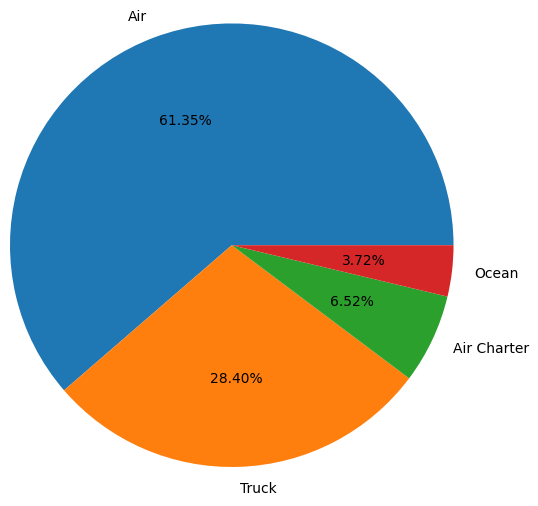

In [23]:
plt.pie(y,labels=x,autopct='%0.2f%%',radius=1.5)
plt.show()

In [24]:
# Most of the shipment carried through the air mode followed by truck, Air charter & ocean

<BarContainer object of 4 artists>

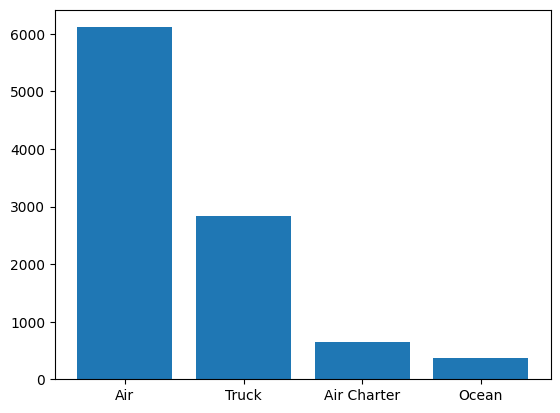

In [25]:
plt.bar(x,y)

In [26]:
# We will remove 

In [27]:
df=df.drop('Item Description',axis=1)
df=df.drop('Molecule/Test Type',axis=1)
df=df.drop('ID',axis=1)

In [28]:
df.head()

,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HRDT,HIV test,RANBAXY Fine Chemicals LTD.,Reveal,NaN,Test kit,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,ARV,Pediatric,Aurobindo Pharma Limited,Generic,10mg/ml,Oral suspension,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,Pre-PQ Process,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,HRDT,HIV test,Abbott GmbH & Co. KG,Determine,NaN,Test kit,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,ARV,Adult,SUN PHARMACEUTICAL INDUSTRIES LTD (RANBAXY LAB...,Generic,150mg,Tablet,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,Pre-PQ Process,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,ARV,Adult,Aurobindo Pharma Limited,Generic,30mg,Capsule,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


In [29]:
df['Fulfill Via'].value_counts()

From RDC       5404
Direct Drop    4920
Name: Fulfill Via, dtype: int64

In [30]:
df['Country'].value_counts()

South Africa          1406
Nigeria               1194
Côte d'Ivoire         1083
Uganda                 779
Vietnam                688
Zambia                 683
Haiti                  655
Mozambique             631
Zimbabwe               538
Tanzania               519
Rwanda                 430
Congo, DRC             333
Guyana                 237
Ethiopia               216
South Sudan            164
Kenya                  111
Burundi                 98
Namibia                 95
Cameroon                75
Botswana                70
Ghana                   58
Dominican Republic      52
Sudan                   46
Swaziland               35
Mali                    17
Guatemala               15
Pakistan                15
Malawi                  14
Benin                   13
Lebanon                  8
Libya                    8
Angola                   7
Liberia                  6
Sierra Leone             4
Lesotho                  4
Senegal                  3
Togo                     3
A

In [31]:
df['Product Group'].value_counts()

ARV     8550
HRDT    1728
ANTM      22
ACT       16
MRDT       8
Name: Product Group, dtype: int64

In [32]:
df['Sub Classification'].value_counts()

Adult                   6595
Pediatric               1955
HIV test                1567
HIV test - Ancillary     161
Malaria                   30
ACT                       16
Name: Sub Classification, dtype: int64

In [33]:
df['First Line Designation'].value_counts()

Yes    7030
No     3294
Name: First Line Designation, dtype: int64

In [34]:
df=df[df['Weight (Kilograms)']!='Weight Captured Separately']
df=df[df['Freight Cost (USD)']!='Freight Included in Commodity Cost']
df=df[df['Freight Cost (USD)']!='Invoiced Separately']

In [35]:
df.shape

(8620, 30)

In [36]:
# To change the data type of Weight & Freight cost feature.

df['Weight (Kilograms)']=pd.to_numeric(df['Weight (Kilograms)'],errors='coerce')
df['Freight Cost (USD)']=pd.to_numeric(df['Freight Cost (USD)'],errors='coerce')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8620 entries, 0 to 10320
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Project Code                  8620 non-null   object 
 1   PQ #                          8620 non-null   object 
 2   PO / SO #                     8620 non-null   object 
 3   ASN/DN #                      8620 non-null   object 
 4   Country                       8620 non-null   object 
 5   Managed By                    8620 non-null   object 
 6   Fulfill Via                   8620 non-null   object 
 7   Vendor INCO Term              8620 non-null   object 
 8   Shipment Mode                 8309 non-null   object 
 9   PQ First Sent to Client Date  8620 non-null   object 
 10  PO Sent to Vendor Date        8620 non-null   object 
 11  Scheduled Delivery Date       8620 non-null   object 
 12  Delivered to Client Date      8620 non-null   object 
 13  De

In [38]:
df.tail(50)

,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
10270,111-MZ-T30,FPQ-14226,SO-48884,DN-3944,Mozambique,PMO - US,From RDC,N/A - From RDC,Truck,5/2/14,N/A - From RDC,31-Dec-14,28-Oct-14,13-Nov-14,ARV,Adult,SCMS from RDC,Generic,300mg,Tablet,30,220,831.60,3.78,0.13,Hetero Unit III Hyderabad IN,No,NaN,NaN,0.85
10271,111-MZ-T30,FPQ-14226,SO-48885,DN-3957,Mozambique,PMO - US,From RDC,N/A - From RDC,Truck,5/2/14,N/A - From RDC,31-Dec-14,1-Dec-14,1-Dec-14,ARV,Adult,SCMS from RDC,Generic,600/300/300mg,Tablet - FDC,30,19492,210123.76,10.78,0.36,Mylan (formerly Matrix) Nashik,No,NaN,NaN,216.01
10272,104-CI-T30,FPQ-14064,SO-48750,DN-3982,Côte d'Ivoire,PMO - US,From RDC,N/A - From RDC,Truck,4/9/14,N/A - From RDC,31-Oct-14,24-Oct-14,6-Nov-14,ARV,Adult,SCMS from RDC,Generic,600/300mg,Tablet - FDC,30,2400,32376.00,13.49,0.45,Mylan (formerly Matrix) Nashik,Yes,213.0,1422.54,33.28
10273,101-CD-T30,FPQ-14576,SO-49290,DN-3975,"Congo, DRC",PMO - US,From RDC,N/A - From RDC,Air,7/14/14,N/A - From RDC,30-Jan-15,18-Feb-15,23-Feb-15,ARV,Adult,SCMS from RDC,Generic,150/300mg,Tablet - FDC,60,4670,30448.40,6.52,0.11,Mylan (formerly Matrix) Nashik,No,NaN,NaN,31.30
10274,101-CD-T30,FPQ-14576,SO-49290,DN-3975,"Congo, DRC",PMO - US,From RDC,N/A - From RDC,Air,7/14/14,N/A - From RDC,30-Jan-15,18-Feb-15,23-Feb-15,ARV,Adult,SCMS from RDC,Generic,150/300/200mg,Tablet - FDC,60,3460,28060.60,8.11,0.14,Mylan (formerly Matrix) Nashik,No,NaN,NaN,28.85
10275,101-CD-T30,FPQ-14576,SO-49290,DN-3975,"Congo, DRC",PMO - US,From RDC,N/A - From RDC,Air,7/14/14,N/A - From RDC,30-Jan-15,18-Feb-15,23-Feb-15,ARV,Adult,SCMS from RDC,Generic,150mg,Tablet,60,1976,3438.24,1.74,0.03,"Aurobindo Unit III, India",No,NaN,NaN,3.53
10276,151-NG-T30,FPQ-14156,SO-48905,DN-3996,Nigeria,PMO - US,From RDC,N/A - From RDC,Air Charter,4/25/14,N/A - From RDC,31-Oct-14,30-Oct-14,3-Nov-14,ARV,Adult,SCMS from RDC,Generic,300/300mg,Tablet - FDC,30,57000,263340.00,4.62,0.15,"Aurobindo Unit VII, IN",Yes,5735.0,20138.00,270.71
10277,107-RW-T30,FPQ-14811,SO-49941,DN-4011,Rwanda,PMO - US,From RDC,N/A - From RDC,Truck,10/15/14,N/A - From RDC,14-Jan-15,13-Nov-14,14-Nov-14,ARV,Pediatric,SCMS from RDC,Generic,30/60mg,Chewable/dispersible tablet - FDC,60,459,913.41,1.99,0.03,"Cipla, Goa, India",No,NaN,NaN,0.94
10278,107-RW-T30,FPQ-14111,SO-48790,DN-4012,Rwanda,PMO - US,From RDC,N/A - From RDC,Truck,4/22/14,N/A - From RDC,16-Feb-15,14-Jan-15,19-Jan-15,ARV,Adult,SCMS from RDC,Generic,600/300mg,Tablet - FDC,30,49270,666130.40,13.52,0.45,Mylan (formerly Matrix) Nashik,No,NaN,NaN,684.78
10279,114-UG-T30,FPQ-14396,SO-48973,DN-4019,Uganda,PMO - US,From RDC,N/A - From RDC,Truck,6/4/14,N/A - From RDC,15-Jan-15,17-Dec-14,22-Dec-14,ARV,Adult,SCMS from RDC,Generic,600mg,Tablet,30,22500,72225.00,3.21,0.11,"Strides, Bangalore, India.",No,NaN,NaN,74.25


In [39]:
df.isnull().sum()

Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    311
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Brand                              0
Dosage                          1576
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
Unit Price                         0
Manufacturing Site                 0
First Line Designation             0
W

In [40]:
df['Scheduled Delivery Date']=pd.to_datetime(df['Scheduled Delivery Date'])
df['Delivered to Client Date']=pd.to_datetime(df['Delivered to Client Date'])
df['Delivery Recorded Date']=pd.to_datetime(df['Delivery Recorded Date'])

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8620 entries, 0 to 10320
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Project Code                  8620 non-null   object        
 1   PQ #                          8620 non-null   object        
 2   PO / SO #                     8620 non-null   object        
 3   ASN/DN #                      8620 non-null   object        
 4   Country                       8620 non-null   object        
 5   Managed By                    8620 non-null   object        
 6   Fulfill Via                   8620 non-null   object        
 7   Vendor INCO Term              8620 non-null   object        
 8   Shipment Mode                 8309 non-null   object        
 9   PQ First Sent to Client Date  8620 non-null   object        
 10  PO Sent to Vendor Date        8620 non-null   object        
 11  Scheduled Delivery Date      

In [42]:
order=df['PO / SO #'].nunique()

In [43]:
order

5623

In [44]:
orderline=df['PO / SO #'].count()

In [45]:
orderline

8620

In [46]:
total_projects=df['Project Code'].nunique()

In [47]:
total_projects

134

In [48]:
total_fright_cost=df['Freight Cost (USD)'].sum()

In [49]:
total_fright_cost

68687760.27

In [50]:
avg_fright_cost=total_fright_cost/order

In [51]:
avg_fright_cost

12215.500670460608

In [52]:
country_summury=df.groupby('Country').sum().reset_index()

In [53]:
country_summury=country_summury[['Country','Freight Cost (USD)']]

In [54]:
country_summury

,Country,Freight Cost (USD)
0,Afghanistan,1081.05
1,Angola,32796.70
2,Benin,66015.17
3,Botswana,137930.17
4,Burundi,312042.32
5,Cameroon,1791260.62
6,"Congo, DRC",699082.91
7,Côte d'Ivoire,6092165.51
8,Dominican Republic,245864.58
9,Ethiopia,1991724.42


In [55]:
country_summury=df.groupby(['Country','Shipment Mode']).sum().reset_index()

In [56]:
country_summury

,Country,Shipment Mode,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,Afghanistan,Air,2100,115,4.617350e+03,111.55,0.34,89.0,1081.05,5.43
1,Angola,Air,690,3620,1.816000e+05,157.56,2.62,1811.0,30832.07,371.68
2,Angola,Truck,120,300,1.680000e+04,112.00,2.40,103.0,1964.63,26.88
3,Benin,Air,665,135913,7.877111e+05,187.47,3.35,12015.0,66015.17,1294.31
4,Botswana,Air,2799,116992,1.545244e+06,5386.50,244.99,23429.0,133841.79,2021.54
...,...,...,...,...,...,...,...,...,...,...
73,Zambia,Truck,19710,21783483,1.686416e+08,2720.20,64.35,2035571.0,2712772.79,263568.08
74,Zimbabwe,Air,12942,1266740,1.401929e+07,3518.39,70.64,194377.0,1534030.08,20763.40
75,Zimbabwe,Air Charter,690,795000,2.742166e+06,71.03,2.18,75746.0,527163.62,2818.92
76,Zimbabwe,Ocean,180,289053,1.327196e+06,17.58,0.29,19826.0,63459.07,1492.15


In [57]:
country_summury=country_summury[['Country','Shipment Mode','Freight Cost (USD)']]

In [58]:
country_summury

,Country,Shipment Mode,Freight Cost (USD)
0,Afghanistan,Air,1081.05
1,Angola,Air,30832.07
2,Angola,Truck,1964.63
3,Benin,Air,66015.17
4,Botswana,Air,133841.79
...,...,...,...
73,Zambia,Truck,2712772.79
74,Zimbabwe,Air,1534030.08
75,Zimbabwe,Air Charter,527163.62
76,Zimbabwe,Ocean,63459.07


In [59]:
country_summury=df.groupby(['Country','Shipment Mode']).agg({'PO / SO #':'count','Freight Cost (USD)':'sum'}).reset_index()

In [60]:
country_summury.head(20)

,Country,Shipment Mode,PO / SO #,Freight Cost (USD)
0,Afghanistan,Air,3,1081.05
1,Angola,Air,5,30832.07
2,Angola,Truck,2,1964.63
3,Benin,Air,12,66015.17
4,Botswana,Air,58,133841.79
5,Botswana,Truck,3,1220.73
6,Burundi,Air,93,312042.32
7,Cameroon,Air,53,1434780.89
8,Cameroon,Air Charter,14,356479.73
9,"Congo, DRC",Air,323,699082.91


In [61]:
country_summury['cost_per_order']=country_summury['Freight Cost (USD)']/country_summury['PO / SO #']

In [62]:
country_summury

,Country,Shipment Mode,PO / SO #,Freight Cost (USD),cost_per_order
0,Afghanistan,Air,3,1081.05,360.350000
1,Angola,Air,5,30832.07,6166.414000
2,Angola,Truck,2,1964.63,982.315000
3,Benin,Air,12,66015.17,5501.264167
4,Botswana,Air,58,133841.79,2307.617069
...,...,...,...,...,...
73,Zambia,Truck,369,2712772.79,7351.687778
74,Zimbabwe,Air,134,1534030.08,11447.985672
75,Zimbabwe,Air Charter,18,527163.62,29286.867778
76,Zimbabwe,Ocean,3,63459.07,21153.023333


In [63]:
plt.figure(figsize=(20,10))
sns.set(font_scale=1.5,palette='dark')

<Figure size 2000x1000 with 0 Axes>

Text(0.5, 1.0, 'Freight cost by shipment per order')

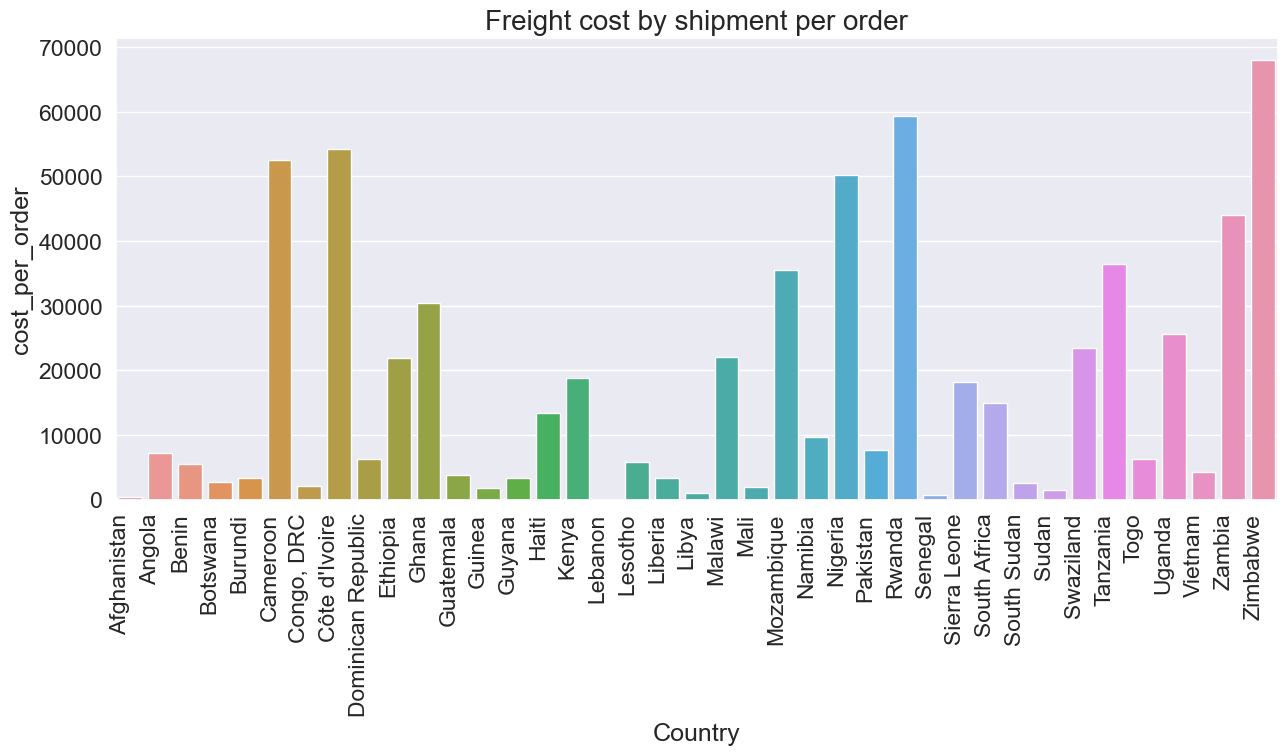

In [64]:
plt.figure(figsize=(15,6))
ax=sns.barplot(data=country_summury,x='Country',y='cost_per_order',ci=None,estimator=sum)

ax.set_xticklabels(ax.get_xticklabels(),rotation=90,ha='right')

plt.title('Freight cost by shipment per order', fontsize=20)

Text(0.5, 1.0, 'Shipment Mode Cost')

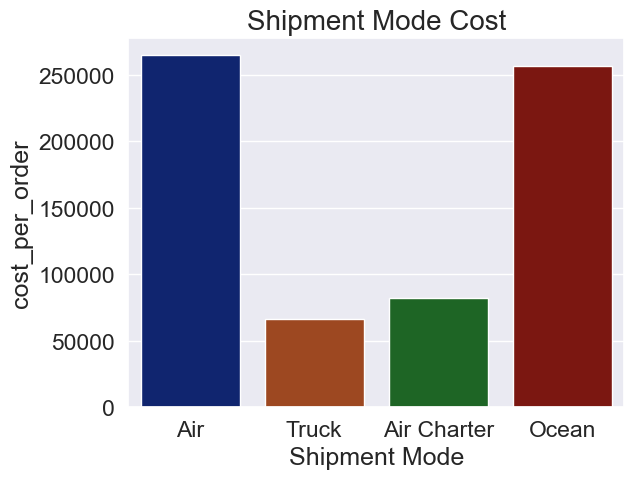

In [65]:
ax=sns.barplot(data=country_summury,x='Shipment Mode',y='cost_per_order',ci=None,estimator=sum)
plt.title('Shipment Mode Cost', fontsize=20)

In [66]:
# Total Freight Cost for top 10 countries

total_freight=df.groupby(['Country'])['Freight Cost (USD)'].sum().nlargest(10)

In [67]:
total_freight

Country
Nigeria          14227197.64
Zambia            6309186.49
Côte d'Ivoire     6092165.51
Rwanda            5890687.72
Uganda            5484292.24
Tanzania          4812951.90
Zimbabwe          4318000.86
Haiti             3999521.29
Mozambique        3277455.32
Vietnam           2735875.80
Name: Freight Cost (USD), dtype: float64

In [68]:
ax1=df.groupby(['Country'])['Freight Cost (USD)'].sum().nlargest(10).reset_index()

Text(0.5, 0, 'Country')

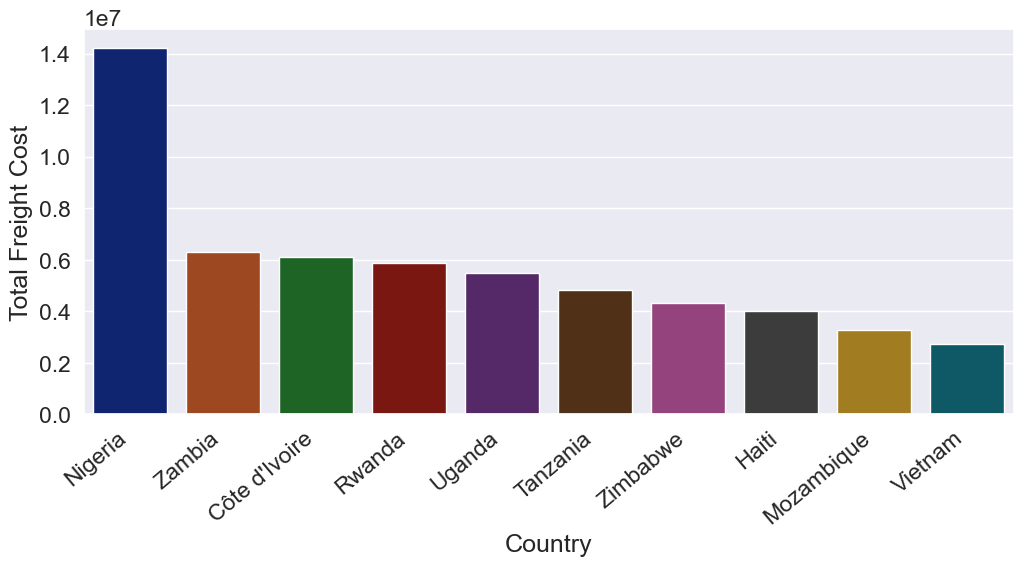

In [69]:
plt.figure(figsize=(12,5))

ax=sns.barplot(data=ax1,x='Country',y='Freight Cost (USD)',ci=None)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.ylabel('Total Freight Cost')
plt.xlabel('Country')

In [70]:
mfg_summury=df.groupby(['Manufacturing Site']).count().reset_index()

In [71]:
mfg_summury

,Manufacturing Site,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,PQ First Sent to Client Date,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Product Group,Sub Classification,Vendor,Brand,Dosage,Dosage Form,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,ABBVIE (Abbott) France,10,10,10,10,10,10,10,10,7,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,6,6,9
1,ABBVIE (Abbott) Logis. UK,140,140,140,140,140,140,140,140,134,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,140,125,125,139
2,ABBVIE (Abbott) St. P'burg USA,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1
3,ABBVIE GmbH & Co.KG Wiesbaden,36,36,36,36,36,36,36,36,27,36,36,36,36,36,36,36,36,36,0,36,36,36,36,36,36,36,34,34,16
4,ABBVIE Ludwigshafen Germany,310,310,310,310,310,310,310,310,298,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,310,277,277,307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,"Standard Diagnostics, Korea",109,109,109,109,109,109,109,109,105,109,109,109,109,109,109,109,109,109,0,109,109,109,109,109,109,109,102,102,105
73,"Strides, Bangalore, India.",514,514,514,514,514,514,514,514,507,514,514,514,514,514,514,514,514,514,514,514,514,514,514,514,514,514,320,320,508
74,"Trinity Biotech, Plc",382,382,382,382,382,382,382,382,373,382,382,382,382,382,382,382,382,382,0,382,382,382,382,382,382,382,305,305,364
75,"Weifa A.S., Hausmanngt. 6, P.O. Box 9113 GrÃ¸n...",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [72]:
mfg_summury=df.groupby(['Manufacturing Site']).agg({'PO / SO #':'count','Freight Cost (USD)':'sum'}).reset_index()

In [73]:
mfg_summury

,Manufacturing Site,PO / SO #,Freight Cost (USD)
0,ABBVIE (Abbott) France,10,29262.03
1,ABBVIE (Abbott) Logis. UK,140,938805.39
2,ABBVIE (Abbott) St. P'burg USA,2,7952.82
3,ABBVIE GmbH & Co.KG Wiesbaden,36,119679.70
4,ABBVIE Ludwigshafen Germany,310,1773632.59
...,...,...,...
72,"Standard Diagnostics, Korea",109,1212535.16
73,"Strides, Bangalore, India.",514,3738725.17
74,"Trinity Biotech, Plc",382,2459749.51
75,"Weifa A.S., Hausmanngt. 6, P.O. Box 9113 GrÃ¸n...",1,399.18


Text(0.5, 0, 'Manufacturing Site')

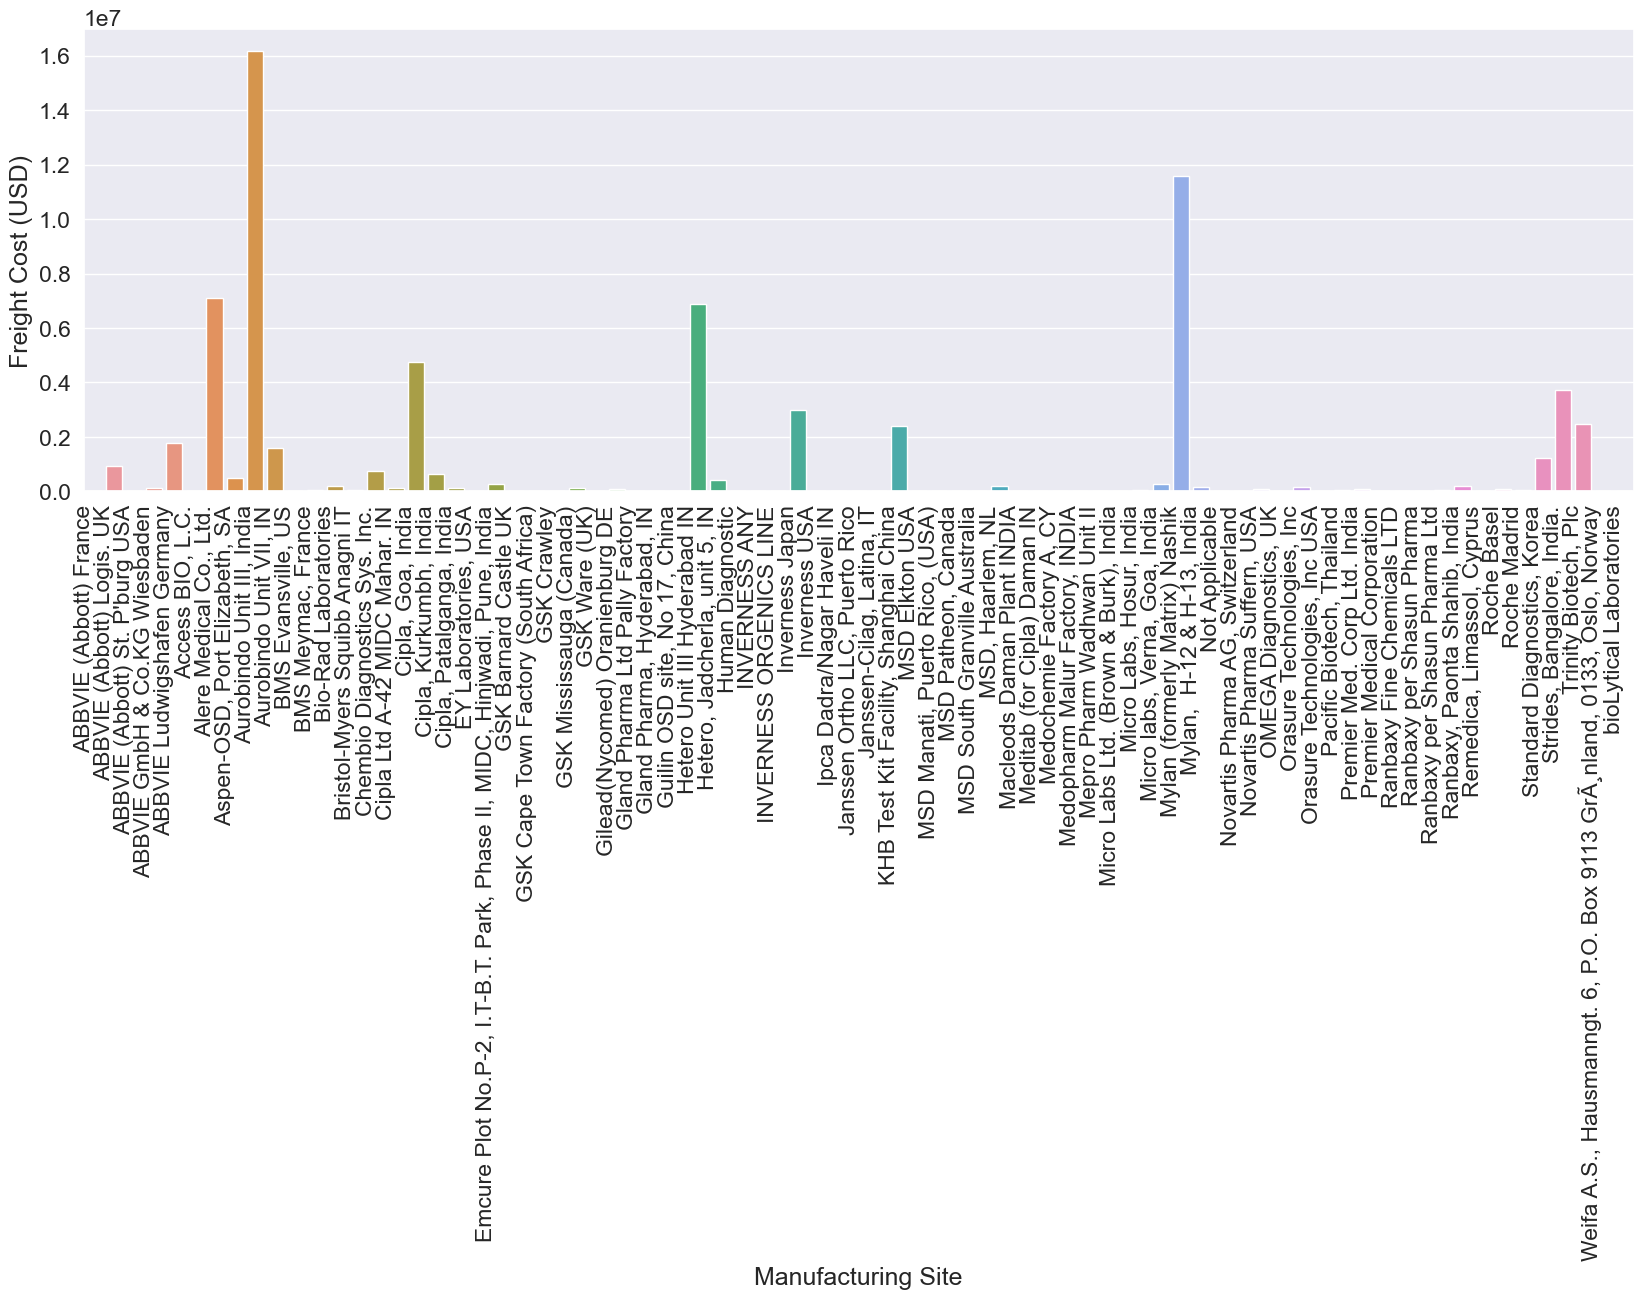

In [74]:
plt.figure(figsize=(20,6))
ax=sns.barplot(data=mfg_summury,x='Manufacturing Site',y='Freight Cost (USD)',ci=None,estimator=sum)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,ha='right')

plt.ylabel('Freight Cost (USD)')
plt.xlabel('Manufacturing Site')